In [1]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [4]:
import os
stockNames=os.listdir("/content/drive/MyDrive/Colab Notebooks/data/csv-10-30/")
print(stockNames)

['AVC.csv', 'ASM.csv', 'BDB.csv', 'BSC.csv', 'ABT.csv', 'AGR.csv', 'C69.csv', 'APS.csv', 'APC.csv', 'BHT.csv', 'BIC.csv', 'ASG.csv', 'BDW.csv', 'BTP.csv', 'CCI.csv', 'BSI.csv', 'AGP.csv', 'C47.csv', 'BCP.csv', 'AMC.csv', 'API.csv', 'ADC.csv', 'AAA.csv', 'BPC.csv', 'ACC.csv', 'BCE.csv', 'BBS.csv', 'BKH.csv', 'CCL.csv', 'BTH.csv', 'AMV.csv', 'BMF.csv', 'BKG.csv', 'BST.csv', 'BII.csv', 'BLT.csv', 'BAB.csv', 'ALT.csv', 'BWA.csv', 'BMS.csv', 'APG.csv', 'BMC.csv', 'BSR.csv', 'AAM.csv', 'C32.csv', 'ABS.csv', 'ACL.csv', 'AAT.csv', 'BRC.csv', 'C21.csv', 'BCC.csv', 'AAV.csv', 'BCG.csv', '1-log-crawl.txt', 'RCL.csv', 'L18.csv', 'PSI.csv', 'FIC.csv', 'QNC.csv', 'CHP.csv', 'FLC.csv', 'SJG.csv', 'MKV.csv', 'DAT.csv', 'GMC.csv', 'NAV.csv', 'S4A.csv', 'DQC.csv', 'GEX.csv', 'MVB.csv', 'CTI.csv', 'DPP.csv', 'CLH.csv', 'KHA.csv', 'SED.csv', 'ITD.csv', 'KHG.csv', 'HBD.csv', 'DTC.csv', 'OCB.csv', 'HBC.csv', 'PVB.csv', 'HU1.csv', 'HC3.csv', 'HDB.csv', 'MIG.csv', 'PTS.csv', 'HT1.csv', 'DRH.csv', 'SGS.csv', '

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/csv-10-30/ASM.csv',
                    names=[ 'date', 'adjust', 'close', 'change_perc', 'avg', 'volume_match', 'value_match', 
                              'volume_reconcile', 'value_reconcile', 'open', 'high', 'low', 'volume'])
data.drop(["change_perc", "volume_match", "avg",
                      "value_match", "volume_reconcile", "value_reconcile"],  axis = 1, inplace = True)


In [6]:
data.head()

,date,adjust,close,open,high,low,volume
0,2016-01-04,12.720,17.1,16.5,17.2,16.5,1201780.0
1,2016-01-05,12.645,17.0,16.8,17.4,16.8,1345450.0
2,2016-01-06,13.389,18.0,16.9,18.0,16.9,1091630.0
3,2016-01-07,13.092,17.6,17.9,17.9,17.4,1316800.0
4,2016-01-08,12.571,16.9,17.4,17.5,16.9,1432450.0


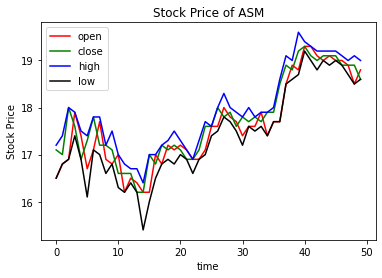

In [12]:
plt.plot( data['open'].values[0:50] , color = 'red' , label = 'open')
plt.plot( data['close'].values[0:50], color = 'green' , label = 'close')
plt.plot( data['high'].values[0:50], color = 'blue' , label = 'high')
plt.plot( data['low'].values[0:50], color = 'black' , label = 'low')
plt.title('Stock Price of ASM')
plt.xlabel('time' )
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
y = data['close']

In [ ]:
data=data.drop('close', axis=1)
data=data.drop('date', axis=1)

In [ ]:
data.head()

,adjust,open,high,low,volume
0,12.720,16.5,17.2,16.5,1201780.0
1,12.645,16.8,17.4,16.8,1345450.0
2,13.389,16.9,18.0,16.9,1091630.0
3,13.092,17.9,17.9,17.4,1316800.0
4,12.571,17.4,17.5,16.9,1432450.0


In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data.values)#chỉ lấy thuộc tính close
index=int(2*scaled.shape[0]/3)

In [ ]:
X_train=scaled[0:index] #Train 2/3 data
y_train=y.values[1:index+1]
# X_train=np.reshape(X_train, (index, 1 , 1))
print(X_train.shape)
print(y_train.shape)

(950, 5)
(950,)


In [ ]:
y_train.reshape(y_train.shape[0],1)

array([[17.  ],
       [18.  ],
       [17.6 ],
       [16.9 ],
       [17.3 ],
       [17.8 ],
       [17.2 ],
       [17.2 ],
       [17.1 ],
       [16.6 ],
       [16.6 ],
       [16.6 ],
       [16.2 ],
       [16.2 ],
       [17.  ],
       [16.8 ],
       [17.2 ],
       [17.1 ],
       [17.2 ],
       [17.1 ],
       [16.9 ],
       [16.9 ],
       [17.1 ],
       [17.6 ],
       [17.6 ],
       [18.  ],
       [17.8 ],
       [17.9 ],
       [17.6 ],
       [17.8 ],
       [17.7 ],
       [17.8 ],
       [17.7 ],
       [17.9 ],
       [17.9 ],
       [18.5 ],
       [18.9 ],
       [18.8 ],
       [19.2 ],
       [19.3 ],
       [19.1 ],
       [19.  ],
       [19.1 ],
       [19.1 ],
       [19.1 ],
       [18.9 ],
       [18.9 ],
       [18.9 ],
       [18.6 ],
       [17.5 ],
       [17.1 ],
       [17.4 ],
       [17.2 ],
       [17.2 ],
       [17.1 ],
       [17.  ],
       [17.3 ],
       [17.  ],
       [17.1 ],
       [17.3 ],
       [17.5 ],
       [17.6 ],
       [

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(None, X_train.shape[1])))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train, y_train, batch_size=126, epochs=500)

Epoch 1/500
8/8 [==============================] - 0s 3ms/step - loss: 166.1271
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 154.0437
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 142.3487
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 129.5776
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 114.8536
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 97.7237
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 78.1621
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 57.6303
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 39.2624
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 25.8145
Epoch 11/500
8/8 [==============================] - 0s 2ms/step - loss: 18.8911
Epoch 12/500
8/8 [==============================] - 0s 3ms/step - loss: 16.8035
Epoch 13/500
8/8 [==========================

Sum loss: [281.57495]


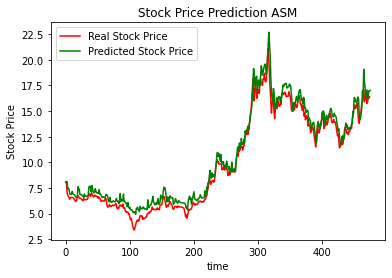

In [ ]:
inputs = scaled[index:]
predicted_stock_price = model.predict(inputs)#predict

# predicted_stock_price=predicted_stock_price.reshape(inputs.shape[0])
real_stock_price=y.values[index+1:]

loss=0
for i in range(len(real_stock_price)):
  loss+=predicted_stock_price[i]-real_stock_price[i]
print('Sum loss: '+str(loss))

plt.plot( real_stock_price[:] , color = 'red' , label = 'Real Stock Price')
plt.plot( predicted_stock_price[:], color = 'green' , label = 'Predicted Stock Price')
plt.title('Stock Price Prediction ASM')
plt.xlabel('time' )
plt.ylabel('Stock Price')
plt.legend()
plt.show()